**Import Libraries**

In [752]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('bank.csv', index_col='RowNumber')
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')
np.random.seed(1)
data.sample(n=10)

There are 10000 rows and 13 columns.


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
9954,15655952,Burke,550,France,Male,47,2,0.00,2,1,1,97057.28,0
3851,15775293,Stephenson,680,France,Male,34,3,143292.95,1,1,0,66526.01,0
4963,15665088,Gordon,531,France,Female,42,2,0.00,2,0,1,90537.47,0
3887,15720941,Tien,710,Germany,Male,34,8,147833.30,2,0,1,1561.58,0
5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.05,1,1,1,176692.65,0
8518,15671800,Robinson,688,France,Male,20,8,137624.40,2,1,1,197582.79,0
2042,15709846,Yeh,840,France,Female,39,1,94968.97,1,1,0,84487.62,0
1990,15622454,Zaitsev,695,Spain,Male,28,0,96020.86,1,1,1,57992.49,0
1934,15815560,Bogle,666,Germany,Male,74,7,105102.50,1,1,1,46172.47,0


In [754]:
data.shape

(10000, 13)

In [755]:
# Let's view the first 5 rows of the data
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [756]:
# Let's check the datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [757]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0


**Initial Observation**
- Almost all age group customers have account in bank. Minimum age is 18 where as maximum is 92. 
- Bank has customers from 3 to 7 years and have 1 to 4 bank's products.
- Customers have fair amount of balance in their Bank accounts.
- There are 3 geographical locations where customers live
- This data set does not have any null values
- Customers have as low as 350 and as high as 850 credit score

**Data Pre-Processing**

Check any duplicate rows in dataset

In [758]:
data[data.duplicated()==True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,


**Check Missing Values**

In [759]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Check Unique values**

In [760]:
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [761]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


- CustomerID is unique to all. Hence can be removed.
- Geography , Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember and Exited look like categorical columns. We can convert their data types to category.

**Convert columns into categorical columns beforing encoding them**

In [762]:
#Converting below columns to category datatype.
data["Geography"] = data["Geography"].astype("category")
data["Gender"] = data["Gender"].astype("category")
data["Tenure"] = data["Tenure"].astype("category")
data["NumOfProducts"] = data["NumOfProducts"].astype("category")
data["HasCrCard"] = data["HasCrCard"].astype("category")
data["IsActiveMember"] = data["IsActiveMember"].astype("category")
data["Exited"] = data["Exited"].astype("category")

In [763]:
# Check categorical columns converted into category datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  category
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  category
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  category
dtypes: category(7), float64(2), int64(3), object(1)
memory usage: 616.4+ KB


CustomerId are ID column and it does not add any value. Hence, dropping off.

In [764]:
data.drop(['CustomerId'], axis=1, inplace=True)

In [765]:
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


Similarly, Surname does not add any value to the model. Hence, dropping off.

In [766]:
data.drop(['Surname'], axis=1, inplace=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [767]:
data.shape

(10000, 11)

Checking duplicate values after removing CustomerID and surname.

In [768]:
data[data.duplicated()==True]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,


**Exploratory Data Analysis (EDA)**
- Univariate, Bivariate Analysis, Outlier Detection
- Observation and key Insights from EDA




In [769]:
'''Below function will plot the histogram and boxplot '''

def histogram_boxplot(data, col_name, figsize=(15, 10), bins=None):
    '''
    data: dataframe
    col_name: dataframe column
    bins: number of bins for histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=(15, 10),
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=col_name, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=col_name, kde=True, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=col_name, kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[col_name].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[col_name].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [770]:
'''Below function will plot the barplot and print % on top'''
def plot_barplot(data, col_name):
    '''
    data: dataframe
    col_name: dataframe column
    '''

    total = len(data[col_name])  # length of the column
    count = data[col_name].nunique()
    plt.figure(figsize=(count + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=col_name,
        palette="Paired",
        order=data[col_name].value_counts().index[:].sort_values(),
    )

    for p in ax.patches:
        label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Univariate Analysis**

**CreditScore Column**

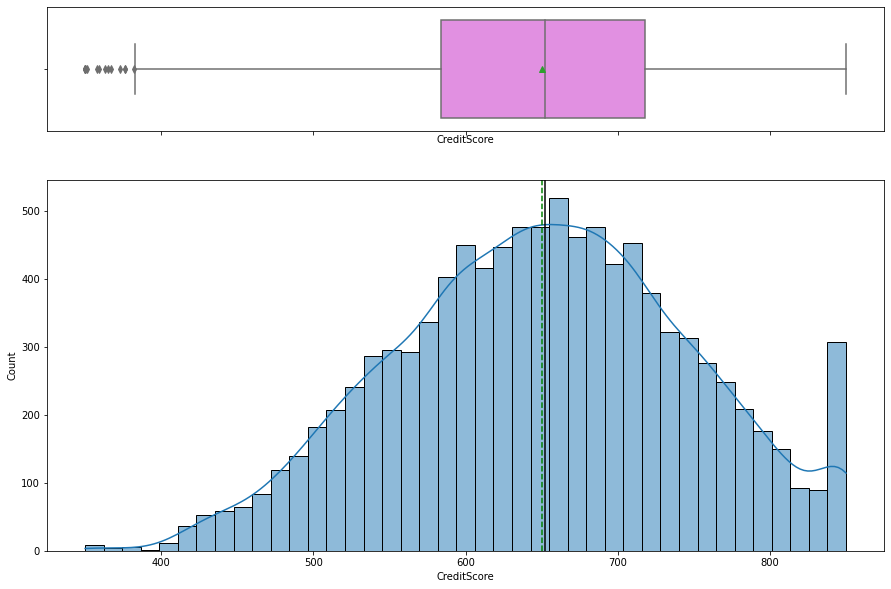

In [771]:
histogram_boxplot(data, 'CreditScore')

Credit score can be < 350 or > 850. Hence these are not treated as outlier.

**Geography Column**

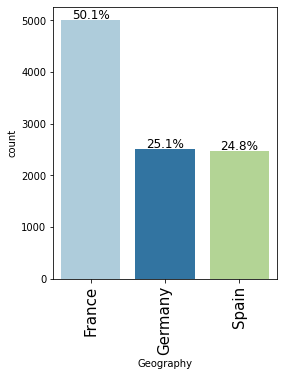

In [772]:
plot_barplot(data, 'Geography')

**Gender Column**

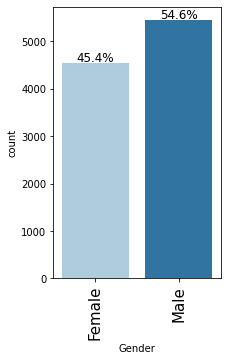

In [773]:
plot_barplot(data, 'Gender')

**Age column**

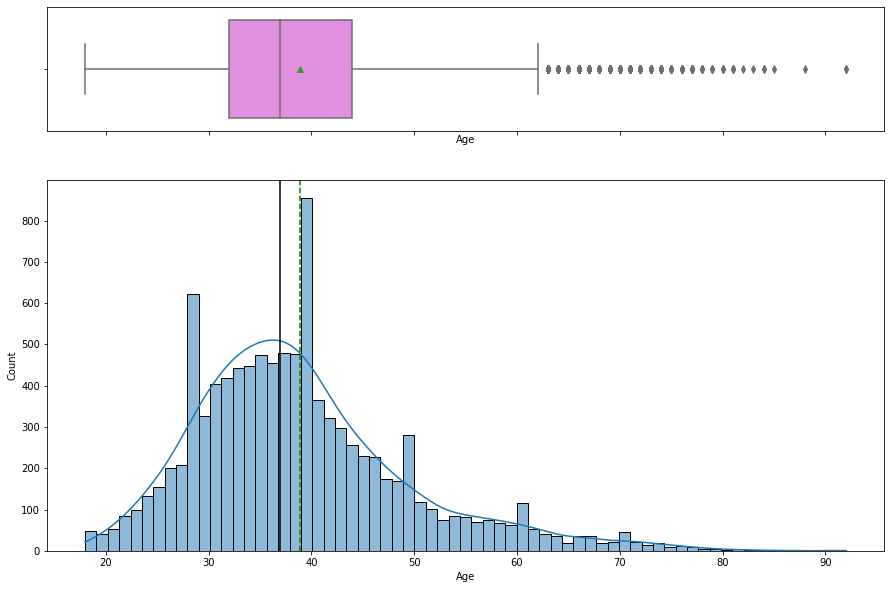

In [774]:
histogram_boxplot(data, 'Age')

**Checking outlier in Age column.**

In [775]:
data[data['Age']>=90]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
6444,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6760,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


It does not look like Age column has any outlier. We dont need to treat it. 

**Tenure column**

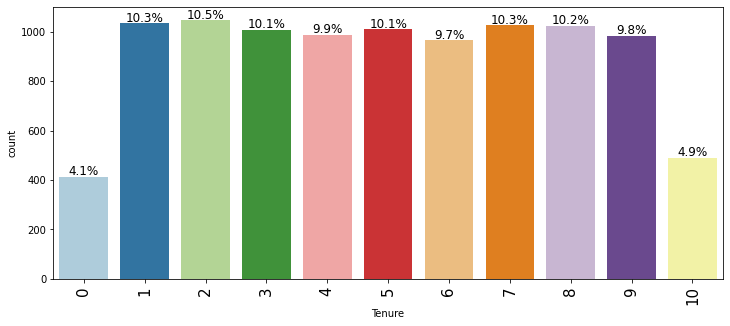

In [776]:
plot_barplot(data, 'Tenure')

**Balance Column**

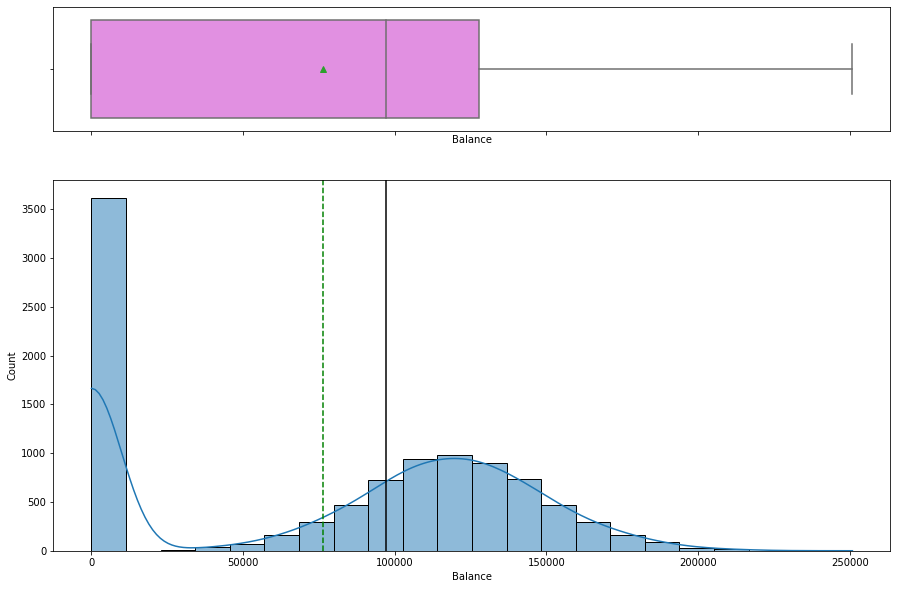

In [777]:
histogram_boxplot(data, 'Balance')

It is possible to have bank balance >= 250K. It does not look like Outlier to me. 

**NumOfProducts column**

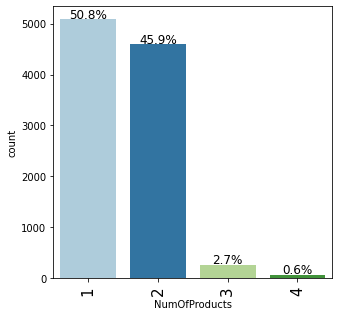

In [778]:
plot_barplot(data, 'NumOfProducts')

**HasCrCard column**

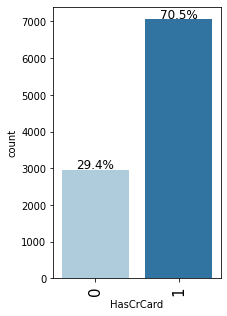

In [779]:

plot_barplot(data, 'HasCrCard')

**IsActiveMember column**

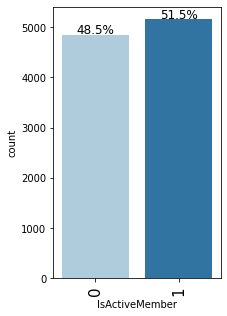

In [780]:

plot_barplot(data, 'IsActiveMember')

**EstimatedSalary Column**

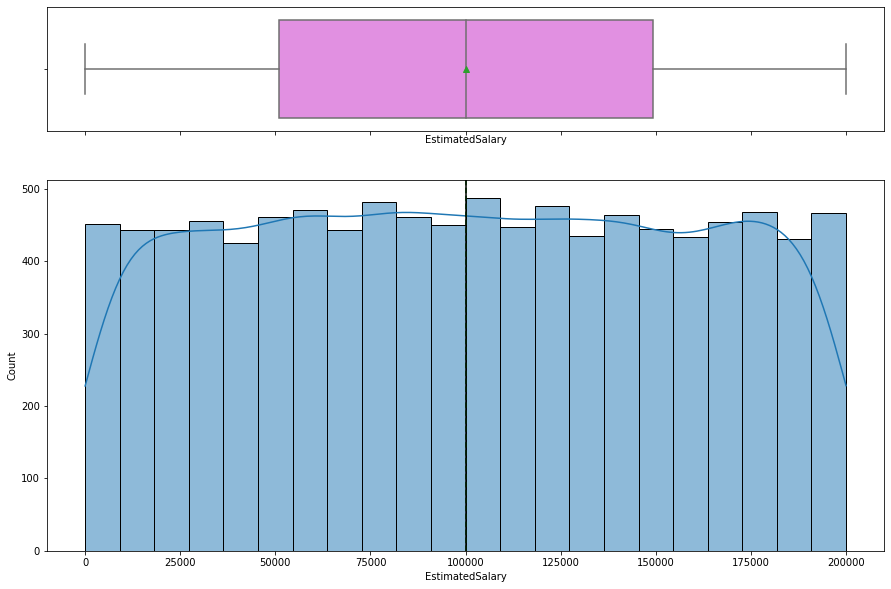

In [781]:
histogram_boxplot(data, 'EstimatedSalary')

Its not clear that the salary is monthly or yearly. I will assume its yearly and customers can have 200K yearly income. Similarly, customers can have < 25K salary too.

**Exited column**

This column looks like Dependent variable

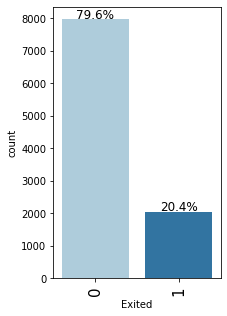

In [782]:
plot_barplot(data, 'Exited')

0    7963
1    2037
Name: Exited, dtype: int64


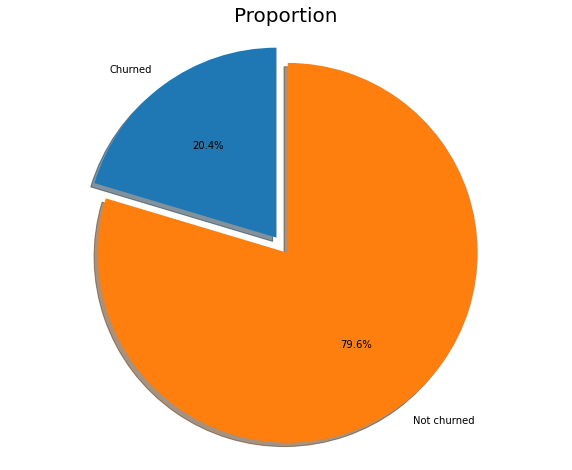

In [783]:
print(data.Exited.value_counts())
labels = 'Churned', 'Not churned'
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

The data is quite imbalanced. Only 20.4% of customers left the bank whereas rest stayed in bank in last 6 months

**Bivariate Analsysis**

Find correlation between all columns

In [784]:
data.corr()

,CreditScore,Age,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.006268,-0.001384
Age,-0.003965,1.000000,0.028308,-0.007201
Balance,0.006268,0.028308,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.012797,1.000000


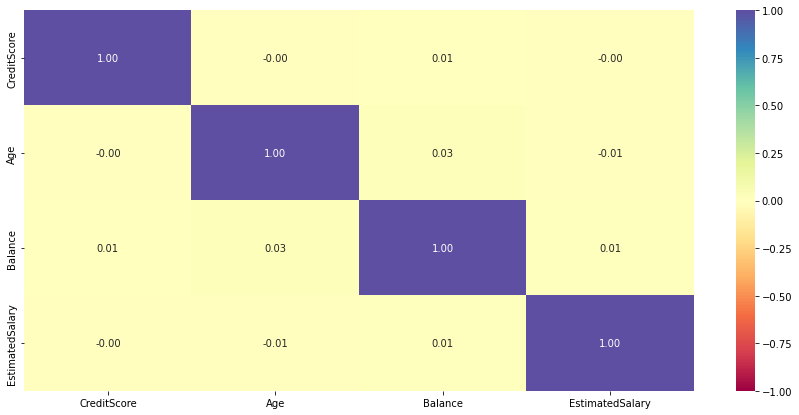

In [785]:
num_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

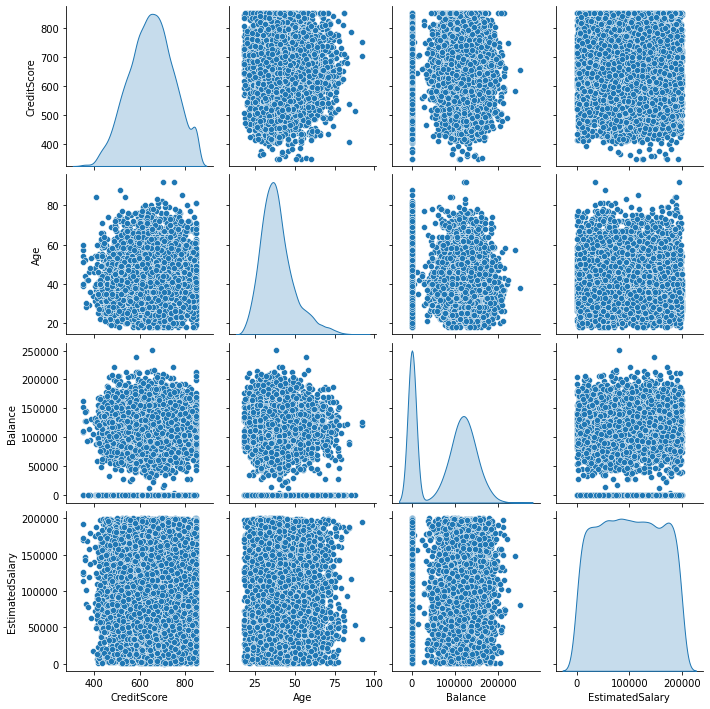

In [786]:
sns.pairplot(data=data[num_col], diag_kind="kde")
plt.show()

In [787]:
# below function will plot the lineplot. 
def plot_lineplot(x_cols, y_col, df):
    for col in x_cols:
        plt.figure(figsize=(10,6))
        sns.lineplot(x=col, y=y_col, data = df, ci=0)
        plt.show()

In [788]:
### function to plot distributions VS target variable


def distribution_plot_wrt_target(data, col_name, target):
    """
    Print the histplot and box plot of features vs target variable

    data: dataframe
    col_name: independent variable or feature
    target: target variable
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=col_name,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="count",
        legend=True
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=col_name,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="count",
        legend=True
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=col_name, ax=axs[1, 0], palette="gist_rainbow")
    
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=col_name,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow"
    )

    plt.tight_layout()
    plt.show()

In [789]:
# function to plot stacked bar chart

def stacked_barplot(data, col_name, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    col_name: independent variable or feature
    target: target variable
    """
    count = data[col_name].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[col_name], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[col_name], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [790]:
#Function to compute the % distribution of column w.r.t target variable. 
def compute_perc_distribution(col_name, target):
    print("Column Name:" + col_name)
    colvalues = data[col_name].unique()
    for value in colvalues:
        print("\nCategory: " + str(value))
        total = data[data[col_name] == value][target].count()
        attrition_yes = data[data[col_name] == value][data[target]==1][target].count()
        attrition_no = data[data[col_name] == value][data[target]==0][target].count()
        print(target + " % Yes =" +  str(attrition_yes/total*100))
        print(target + " % No =" +  str(attrition_no/total*100))

**CreditScore VS Exited**

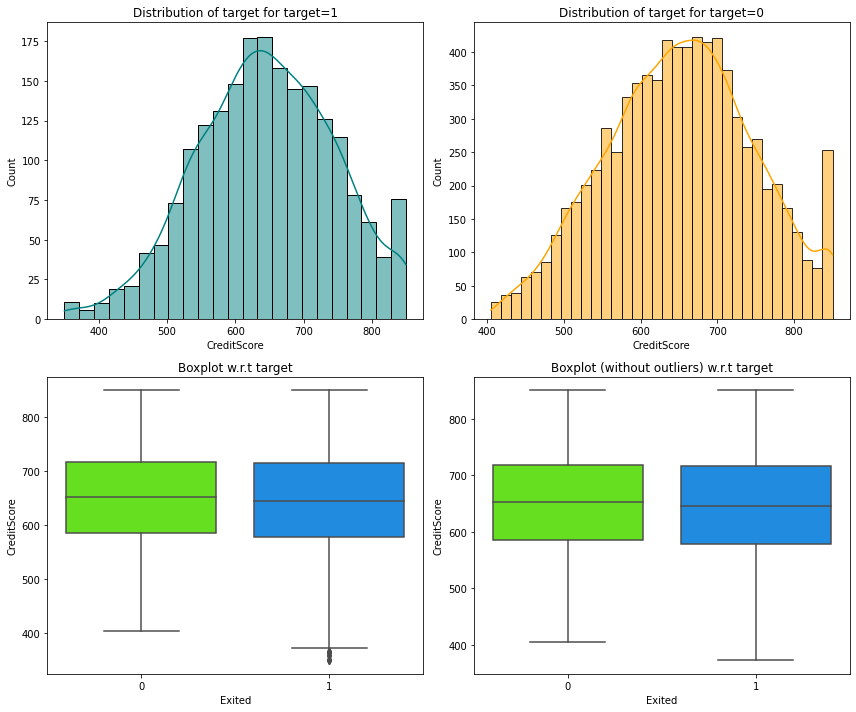

In [791]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

**Geography VS Exited**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


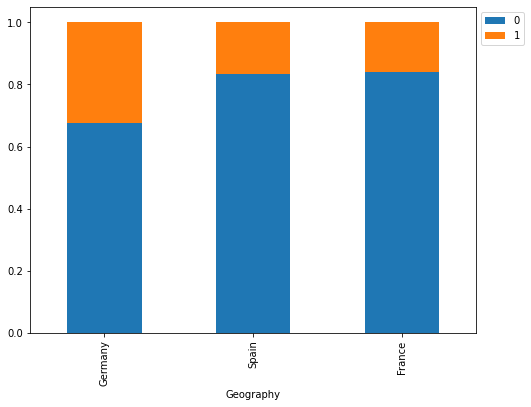

Column Name:Geography

Category: France
Exited % Yes =16.15476665337056
Exited % No =83.84523334662943

Category: Spain
Exited % Yes =16.673395236172787
Exited % No =83.3266047638272

Category: Germany
Exited % Yes =32.44320446392985
Exited % No =67.55679553607014


In [792]:
stacked_barplot(data, "Geography", "Exited")
compute_perc_distribution("Geography", "Exited")

**Gender VS Exited**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


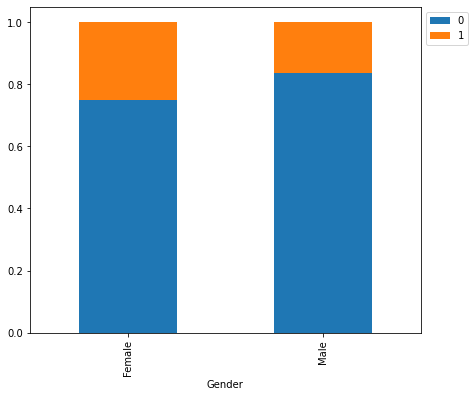

Column Name:Gender

Category: Female
Exited % Yes =25.071538630860662
Exited % No =74.92846136913933

Category: Male
Exited % Yes =16.455928165658786
Exited % No =83.54407183434121


In [793]:
stacked_barplot(data, "Gender", "Exited")
compute_perc_distribution("Gender", "Exited")

**Age VS Exited**

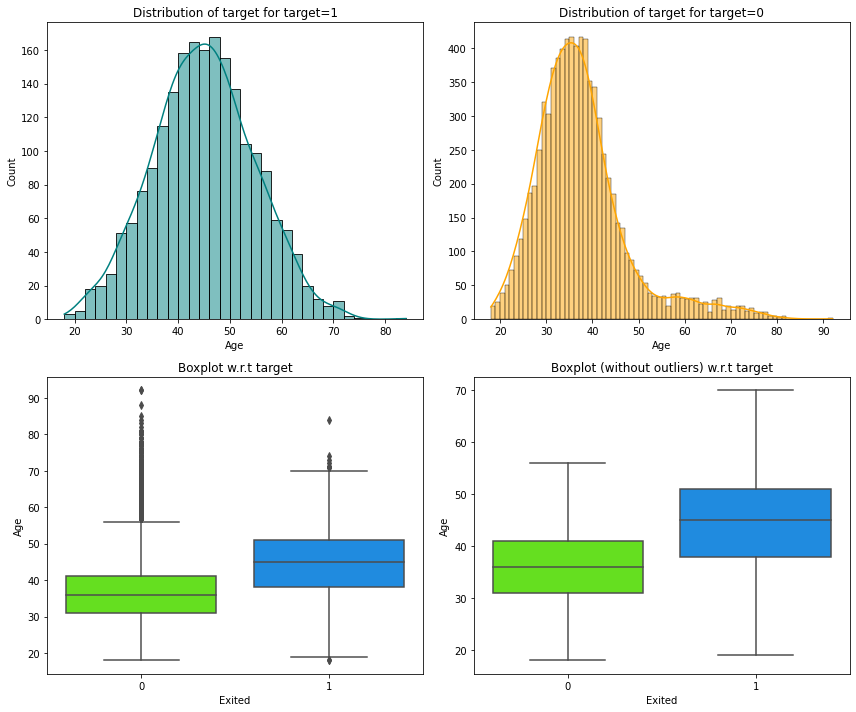

In [794]:
distribution_plot_wrt_target(data, "Age", "Exited")

**Tenure VS Exited**

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


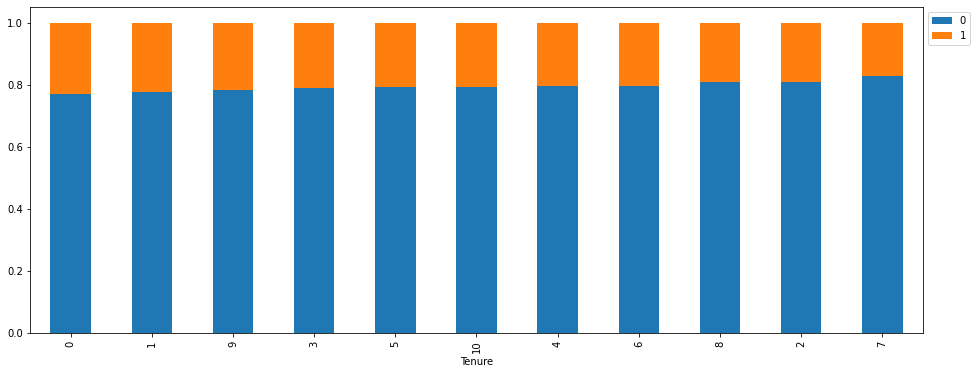

Column Name:Tenure

Category: 2
Exited % Yes =19.1793893129771
Exited % No =80.82061068702289

Category: 1
Exited % Yes =22.415458937198068
Exited % No =77.58454106280193

Category: 8
Exited % Yes =19.21951219512195
Exited % No =80.78048780487805

Category: 7
Exited % Yes =17.217898832684824
Exited % No =82.78210116731518

Category: 4
Exited % Yes =20.525783619817997
Exited % No =79.474216380182

Category: 6
Exited % Yes =20.2688728024819
Exited % No =79.73112719751809

Category: 3
Exited % Yes =21.110009910802773
Exited % No =78.88999008919723

Category: 10
Exited % Yes =20.612244897959183
Exited % No =79.38775510204081

Category: 5
Exited % Yes =20.652173913043477
Exited % No =79.34782608695652

Category: 9
Exited % Yes =21.646341463414632
Exited % No =78.35365853658537

Category: 0
Exited % Yes =23.002421307506054
Exited % No =76.99757869249395


In [795]:
stacked_barplot(data, "Tenure", "Exited")
compute_perc_distribution("Tenure", "Exited")

**NumOfProducts VS Exited**

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


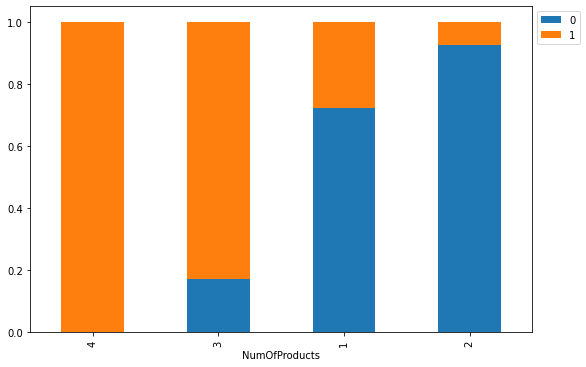

Column Name:NumOfProducts

Category: 1
Exited % Yes =27.714398111723053
Exited % No =72.28560188827696

Category: 3
Exited % Yes =82.70676691729322
Exited % No =17.293233082706767

Category: 2
Exited % Yes =7.5816993464052285
Exited % No =92.41830065359477

Category: 4
Exited % Yes =100.0
Exited % No =0.0


In [796]:
stacked_barplot(data, "NumOfProducts", "Exited")
compute_perc_distribution("NumOfProducts", "Exited")

**Balance VS Exited**

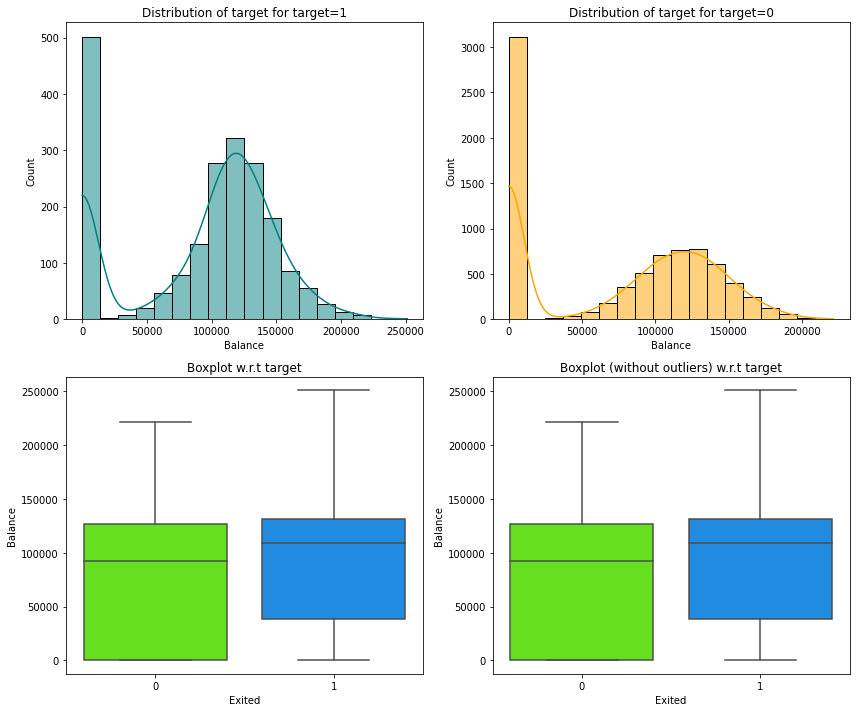

In [797]:
distribution_plot_wrt_target(data, "Balance", "Exited")

**HascrCard VS Exited**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


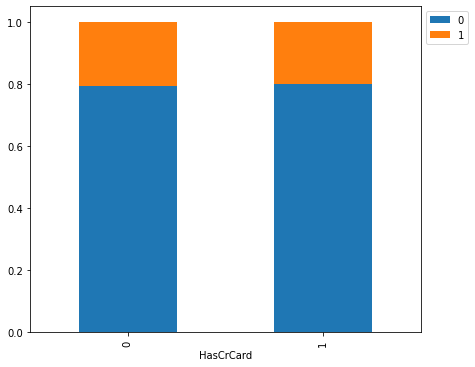

Column Name:HasCrCard

Category: 1
Exited % Yes =20.184266477675408
Exited % No =79.81573352232459

Category: 0
Exited % Yes =20.814940577249573
Exited % No =79.18505942275043


In [798]:
stacked_barplot(data, "HasCrCard", "Exited")
compute_perc_distribution("HasCrCard", "Exited")

**EstimatedSalary VS Exited**

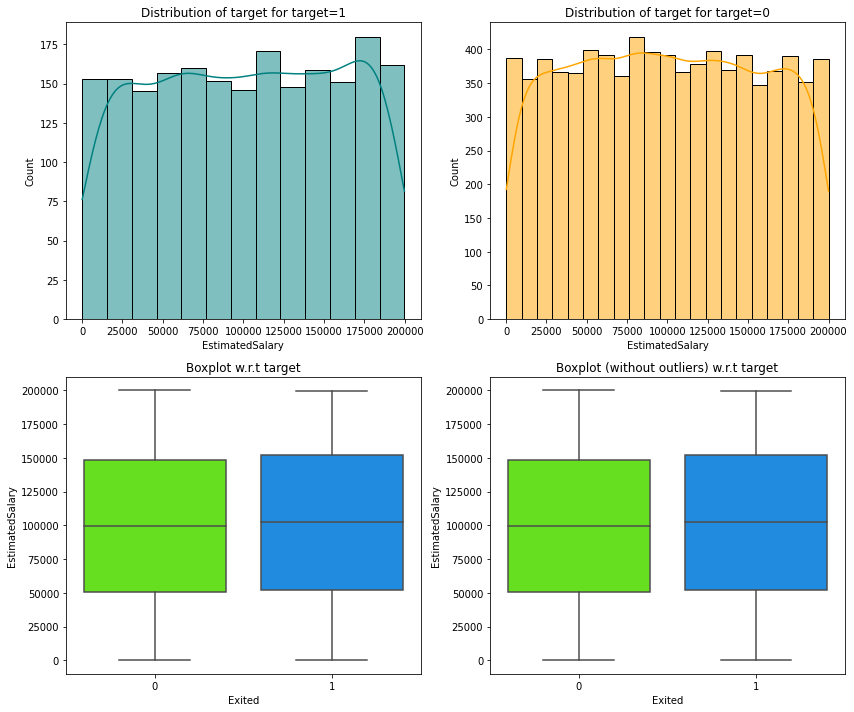

In [799]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Exited")

**IsActiveMember VS Exited**

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


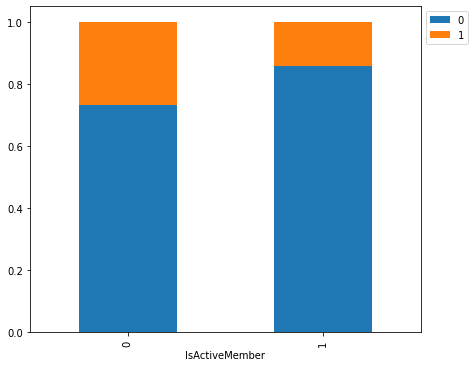

Column Name:IsActiveMember

Category: 1
Exited % Yes =14.269073966220153
Exited % No =85.73092603377985

Category: 0
Exited % Yes =26.850897092183956
Exited % No =73.14910290781604


In [800]:
stacked_barplot(data, "IsActiveMember", "Exited")
compute_perc_distribution("IsActiveMember", "Exited")

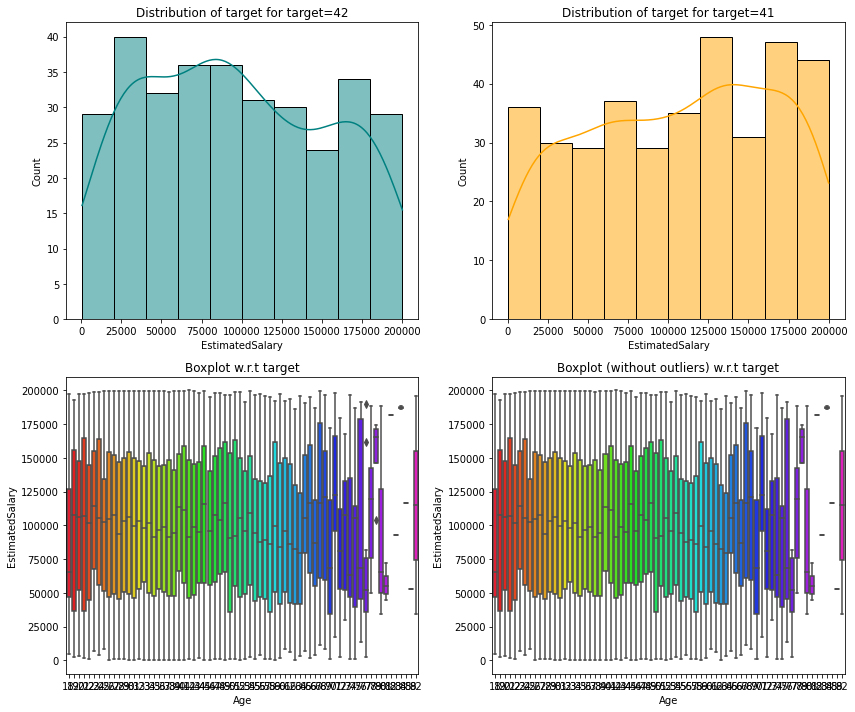

In [801]:
distribution_plot_wrt_target(data, "EstimatedSalary", "Age")

**Illustrate the insights based on Univariate, Bivariate and EDA analysis**
- Majority of the customers are from France and very less from Germany. Interestingly, 32% of customers from Germany left the bank than any other locations
- Male customers are higher in Bank, but Female tend to leave the bank higher than men.
- Customers with extreme level of tenure i.e. either 0 years old or 10 years old customers are less as compare to other tenures.
- Age, Tenure, Has Credit Card, Salary does not matter in leaving the bank.
- Customers have either 1 or 2 products more than 3 or 4. Surprisingly, the customers with 3 or 4 products are leaving the bank most than 1 or 2. 
- Majority of the customers have credit card
- Customers who are not active are leaving more. 26% of the customers who are not active left where are only 14% of customers who are active have left. 
- Customers with any age have higher or lower salary. There is no relationship between these two.
- The dependent column is quite imbalanced i.e. only 20% of customers left the bank in last 6 months


**Data Preparation for Modeling**

Divide dataset into train, test before treating missing values to avoid data leakage. Also, Encode categorical data and scale them before training models on them.

In [802]:
## Separating Independent and Dependent Columns
X = data.drop(['Exited'],axis=1)
Y = data[['Exited']]

In [803]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1,stratify = Y)

In [804]:
Y.head()

,Exited
RowNumber,
1,1
2,0
3,1
4,0
5,0


In [805]:
X_train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [806]:
X_test.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

The dataset does not have any null values.

In [807]:
from sklearn.preprocessing import LabelEncoder

In [808]:
labelencoder_geo = LabelEncoder()
X_train['Geography']= labelencoder_geo.fit_transform(X_train['Geography'])
X_test['Geography']= labelencoder_geo.transform(X_test['Geography'])

In [809]:
labelencoder_gen = LabelEncoder()
X_train['Gender']= labelencoder_gen.fit_transform(X_train['Gender'])
X_test['Gender']= labelencoder_gen.transform(X_test['Gender'])

In [810]:
labelencoder_prod = LabelEncoder()
X_train['NumOfProducts']= labelencoder_prod.fit_transform(X_train['NumOfProducts'])
X_test['NumOfProducts']= labelencoder_prod.transform(X_test['NumOfProducts'])

In [811]:
labelencoder_ten = LabelEncoder()
X_train['Tenure']= labelencoder_ten.fit_transform(X_train['Tenure'])
X_test['Tenure']= labelencoder_ten.transform(X_test['Tenure'])

In [812]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
4257,596,2,0,76,9,134208.25,0,1,1,13455.43
9152,614,0,1,49,1,0.00,1,1,0,192440.54
697,445,2,1,62,1,64119.38,0,1,1,76569.64
4899,544,0,0,40,7,0.00,0,0,1,161076.92
6428,746,0,1,37,2,0.00,1,1,0,143194.05


In [813]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


In [814]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [815]:
X_train

array([[-0.55659995,  1.51162316, -1.0952694 , ...,  0.6493972 ,
         0.96728484, -1.50521554],
       [-0.37047162, -0.90311032,  0.91301738, ...,  0.6493972 ,
        -1.03382164,  1.61465549],
       [-2.11800977,  1.51162316,  0.91301738, ...,  0.6493972 ,
         0.96728484, -0.40507824],
       ...,
       [-0.49455717,  1.51162316,  0.91301738, ...,  0.6493972 ,
        -1.03382164, -1.05050322],
       [ 2.0698775 , -0.90311032,  0.91301738, ..., -1.53988961,
         0.96728484,  0.33857072],
       [ 0.78766016, -0.90311032,  0.91301738, ..., -1.53988961,
        -1.03382164, -0.03047309]])

**SMOTE**

I am going to use SMOTE training set in few models. Hence using this technique to get balanced training set. I am not using stratify while applying SMOTE. 
Hence, not directly using X_train and X_test to apply SMOTE.

In [816]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,Y, test_size = 0.2, random_state = 1)

In [817]:
labelencoder_geo = LabelEncoder()
X_train_1['Geography']= labelencoder_geo.fit_transform(X_train_1['Geography'])
X_test_1['Geography']= labelencoder_geo.transform(X_test_1['Geography'])

In [818]:
labelencoder_gen = LabelEncoder()
X_train_1['Gender']= labelencoder_gen.fit_transform(X_train_1['Gender'])
X_test_1['Gender']= labelencoder_gen.transform(X_test_1['Gender'])

In [819]:
labelencoder_prod = LabelEncoder()
X_train_1['NumOfProducts']= labelencoder_prod.fit_transform(X_train_1['NumOfProducts'])
X_test_1['NumOfProducts']= labelencoder_prod.transform(X_test_1['NumOfProducts'])

In [820]:
labelencoder_ten = LabelEncoder()
X_train_1['Tenure']= labelencoder_ten.fit_transform(X_train_1['Tenure'])
X_test_1['Tenure']= labelencoder_ten.transform(X_test_1['Tenure'])

In [821]:
X_train_1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
2695,628,1,1,29,3,113146.98,1,0,1,124749.08
5141,626,0,0,29,4,105767.28,1,0,0,41104.82
2569,612,1,0,47,6,130024.87,0,1,1,45750.21
3672,646,1,0,52,6,111739.40,1,0,1,68367.18
7428,714,2,1,33,8,122017.19,0,0,0,162515.17


In [822]:
###Checking the shape of train and test sets
print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


In [823]:
sc_1 = StandardScaler()
X_train_1 = sc_1.fit_transform(X_train_1)
X_test_1 = sc_1.transform(X_test_1)

In [824]:
##Applying SMOTE on train
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train_1,y_train_1)

In [825]:
print("After Oversampling, the shape of train_X: {}".format(X_sm.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_sm.shape))

After Oversampling, the shape of train_X: (12756, 10)
After Oversampling, the shape of train_y: (12756, 1) 



In [826]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_and_report(model, features, target, threshold):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    features: independent variables
    target: dependent variable
    threshold: threshold for the prediction
    """
    y_pred = model.predict(features)
    y_pred = (y_pred > threshold)
    
    cm = metrics.confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


    #Accuracy as per the classification report 
    print("\nClassification Report:\n")
    cr=metrics.classification_report(y_test,y_pred)
    print(cr)

**Model Building and Model Performance Improvement**

A model can make wrong predictions in the following ways:
- Predicting a customer leaving the bank, when he/she is not leaving.
- Predicting a customer is not leaving the bank, when he/she is leaving.

**Which case is more important?**

Both cases are actually important for the purposes of this case study. 

- By wrongly classifying customers as likely to leave - might lead to losing that customer which can affect Bank's growth. 
- However, focusing on customers who are likely to leave would lead to a financial loss for the company, this might again affect the Bank's growth.

**How to reduce this loss** i.e need to reduce False Negatives as well as False Positive

**Model Performance Evaluation**
Since both errors are important for us to minimize, the bank would want the **F1 Score** evaluation metric to be maximized/ Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.

In [827]:
# defining a function to compute different metrics to check performance of a model

def model_performance_classification(model, features, target, threshold):
    """
    

    model: classifier
    features: independent variables
    target: dependent variable
    threshold: threshold for the prediction
    """
    pred = model.predict(features)
    pred = (pred > threshold)
    accuracy = metrics.accuracy_score(target, pred)  #compute Accuracy
    recall = metrics.recall_score(target, pred)  #compute Recall
    precision = metrics.precision_score(target, pred)  #compute Precision
    f1 = metrics.f1_score(target, pred)  #compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

I will try various different models with different methods to identify best model with F1 score. 
- We will use binary_crossentropy loss function as it is classification problem.
- We will use signoid activation function as it is classification problem.

**Model1 - 1 hidden layer using adam optimizer and defualt learning rate**

In [832]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [833]:
# Initializing the ANN
model1 = Sequential()
model1.add(Dense(6, activation = 'relu', input_dim = X_train.shape[1]))
#Add 1st hidden layer
model1.add(Dense(6, activation='relu'))
# Adding the output layer
model1.add(Dense(1, activation = 'sigmoid')) 
# Create optimizer with default learning rate
# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 66        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [834]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 66        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [835]:
# fitting model using 100 epochs and 32 batch size.
history1=model1.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=100,
          batch_size=32,verbose=1)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5605 - accuracy: 0.7720 - val_loss: 0.5124 - val_accuracy: 0.7906
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7977 - val_loss: 0.4813 - val_accuracy: 0.7906
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7977 - val_loss: 0.4638 - val_accuracy: 0.7906
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7978 - val_loss: 0.4500 - val_accuracy: 0.7925
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8025 - val_loss: 0.4378 - val_accuracy: 0.7981
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8072 - val_loss: 0.4289 - val_accuracy: 0.8031
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8103 - val_loss: 0.4198 - val_accuracy: 0.8075

63/63 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8625


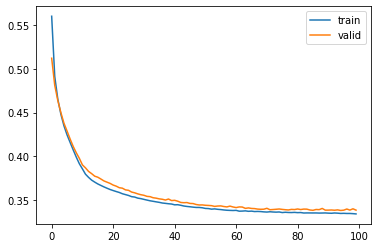

In [836]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results1 = model1.evaluate(X_test, y_test)

From above plot, we can say that the validation and training curve are smooth.

Best Threshold=0.176966, G-Mean=0.768


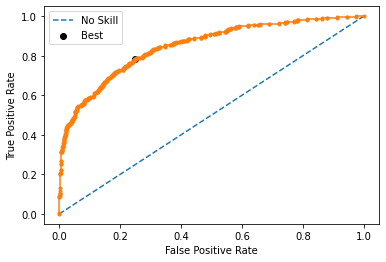

In [837]:
# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1593
           1       0.45      0.78      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



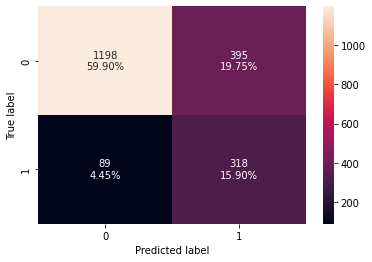

In [838]:
#Confustion matrix based on the threshold got from above plot
confusion_matrix_and_report(model1,  X_test, y_test, thresholds1[ix])

In [839]:
model_performance_classification(model1,  X_test, y_test, thresholds1[ix])

,Accuracy,Recall,Precision,F1
0,0.758,0.781327,0.446003,0.567857


The model1 is giving 56.7% F1 score and 4.4% FP and 19.75% FN. 

**Model 2 - 3 hidden layers, 50 epochs, learning rate 0.0001 and he_uniform initializer.**

In [840]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [841]:
model2 = Sequential()
      #Adding the hidden and output layers
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(16,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.0001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                704       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [842]:
history2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.5461 - accuracy: 0.7439 - val_loss: 0.5287 - val_accuracy: 0.7700
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7892 - val_loss: 0.5024 - val_accuracy: 0.7912
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.7961 - val_loss: 0.4855 - val_accuracy: 0.7944
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4664 - accuracy: 0.7983 - val_loss: 0.4734 - val_accuracy: 0.7987
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4559 - accuracy: 0.7997 - val_loss: 0.4635 - val_accuracy: 0.8050
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.8042 - val_loss: 0.4557 - val_accuracy: 0.8100
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8089 - val_loss: 0.4488 - val_accuracy: 0.8144
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8530


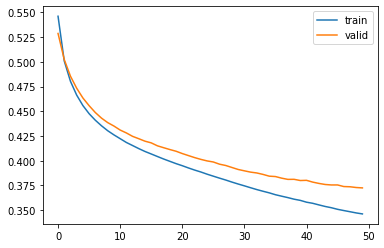

In [843]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results2 = model2.evaluate(X_test, y_test)

From above plot, we can say that the validation and training curve are smooth.

Best Threshold=0.218378, G-Mean=0.759


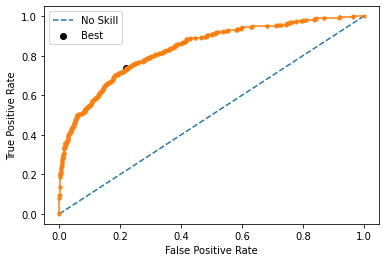

In [844]:
# predict probabilities
yhat1 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1593
           1       0.46      0.73      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.79      2000



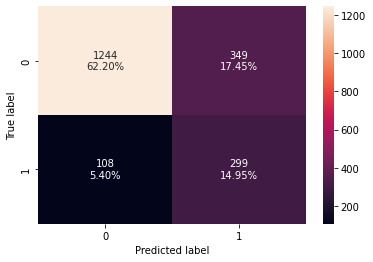

In [845]:
#Confustion matrix based on the threshold got from above plot
confusion_matrix_and_report(model2,  X_test, y_test, thresholds1[ix])

In [846]:
model_performance_classification(model2,  X_test, y_test, thresholds1[ix])

,Accuracy,Recall,Precision,F1
0,0.7715,0.734644,0.46142,0.566825



The model2 is giving 56% F1 score and 5.4% FP and 17.45% FN. 
It increased the FP, but reduced the FN from previous model. 

**Model 3 Batch Normalization with 3 hidden layers**

In [847]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [848]:
model3 = Sequential()
model3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
model3.add(BatchNormalization())
model3.add(Dense(16,activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation = 'sigmoid'))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [849]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [850]:
history3 = model3.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.6004 - accuracy: 0.6952 - val_loss: 0.5383 - val_accuracy: 0.7931
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4623 - accuracy: 0.8047 - val_loss: 0.4374 - val_accuracy: 0.8163
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8259 - val_loss: 0.3970 - val_accuracy: 0.8319
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8364 - val_loss: 0.3759 - val_accuracy: 0.8438
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8402 - val_loss: 0.3693 - val_accuracy: 0.8481
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 0.8470 - val_loss: 0.3652 - val_accuracy: 0.8438
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8450 - val_loss: 0.3620 - val_accuracy: 0.8462

63/63 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8570


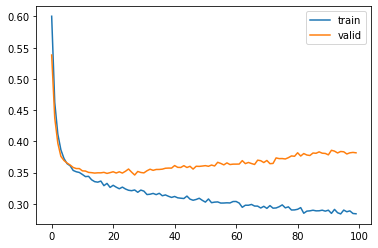

In [851]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history3.history)
hist['epoch'] = history3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results3 = model3.evaluate(X_test, y_test)

From above plot, we can say that the model is overfitting, because the training set and validation test are apart from each other in terms of loss.

Best Threshold=0.205769, G-Mean=0.757


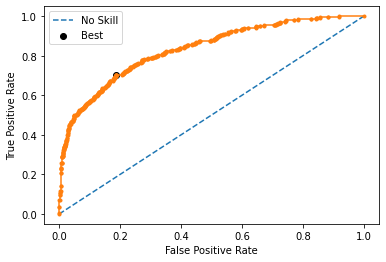

In [852]:
# predict probabilities
yhat1 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1593
           1       0.49      0.70      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



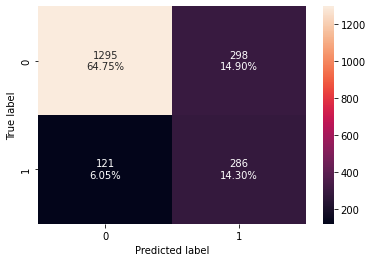

In [853]:

#Confustion matrix based on the threshold got from above plot
confusion_matrix_and_report(model3,  X_test, y_test, thresholds1[ix])

In [854]:
model_performance_classification(model3,  X_test, y_test, thresholds1[ix])

,Accuracy,Recall,Precision,F1
0,0.7905,0.702703,0.489726,0.577195


The model3 is giving 57.7% F1 score and 6.05% FP and 14.90% FN. It increased the FP & FN as compared to model2. This is overfitting the model, hence not a good choice to select.

**Model 4 Batch Normalization with only one hidden layer**

In [855]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [856]:
model4 = Sequential()
model4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
model4.add(BatchNormalization())
model4.add(Dense(16,activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(1, activation = 'sigmoid'))
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,025
Trainable params: 961
Non-trainable params: 64
_________________________________________________________________


In [857]:
optimizer = tf.keras.optimizers.Adam(0.001)
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [858]:
history4 = model4.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 0.4888 - accuracy: 0.7912 - val_loss: 0.4697 - val_accuracy: 0.8000
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8188 - val_loss: 0.4287 - val_accuracy: 0.8181
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8334 - val_loss: 0.3984 - val_accuracy: 0.8275
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8438 - val_loss: 0.3786 - val_accuracy: 0.8394
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3578 - accuracy: 0.8517 - val_loss: 0.3685 - val_accuracy: 0.8487
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8541 - val_loss: 0.3652 - val_accuracy: 0.8487
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8545 - val_loss: 0.3610 - val_accuracy: 0.8506

63/63 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8545


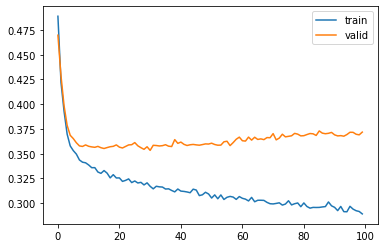

In [859]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history4.history)
hist['epoch'] = history4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results4 = model4.evaluate(X_test, y_test)

From above plot, we can say that the model is overfitting, because the training set and validation test are apart from each other in terms of loss.

Best Threshold=0.181782, G-Mean=0.760


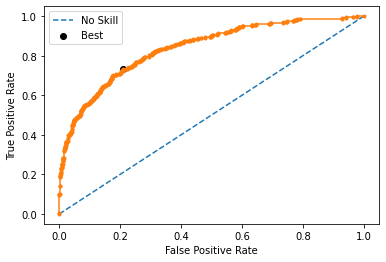

In [860]:
# predict probabilities
yhat1 = model4.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.73      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



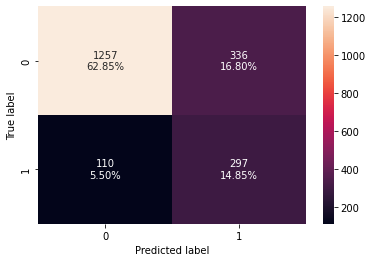

In [861]:
#Confustion matrix based on the threshold got from above plot
confusion_matrix_and_report(model4,  X_test, y_test, thresholds1[ix])

In [862]:
model_performance_classification(model4,  X_test, y_test, thresholds1[ix])

,Accuracy,Recall,Precision,F1
0,0.777,0.72973,0.469194,0.571154


The model4 is giving 57.1% F1 score and 5.5% FP and 16.80% FN. It increased the FP & decreased the FN as compared to model3. But since this is overfitting the model, its not a good choice to select.


**Model 5 - Apply Dropout**

In [863]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [864]:
model5 = Sequential()
model5.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
model5.add(Dropout(0.2))
model5.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model5.add(Dense(1, activation = 'sigmoid'))
model5.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


In [865]:
optimizer = tf.keras.optimizers.Adam(0.0001)
model5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [866]:
history5 = model5.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 0.6205 - accuracy: 0.6806 - val_loss: 0.5986 - val_accuracy: 0.7225
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.7445 - val_loss: 0.5703 - val_accuracy: 0.7644
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7686 - val_loss: 0.5499 - val_accuracy: 0.7763
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5492 - accuracy: 0.7873 - val_loss: 0.5340 - val_accuracy: 0.7869
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.7917 - val_loss: 0.5220 - val_accuracy: 0.7887
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7925 - val_loss: 0.5120 - val_accuracy: 0.7900
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7980 - val_loss: 0.5035 - val_accuracy: 0.7912

63/63 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8585


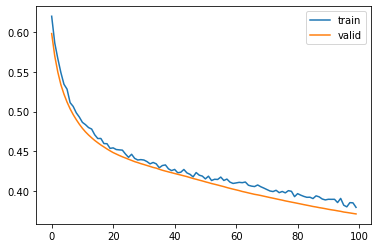

In [867]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history5.history)
hist['epoch'] = history5.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results5 = model5.evaluate(X_test, y_test)


From above plot, we can say that the validation and training curve are smooth.

Best Threshold=0.230662, G-Mean=0.760


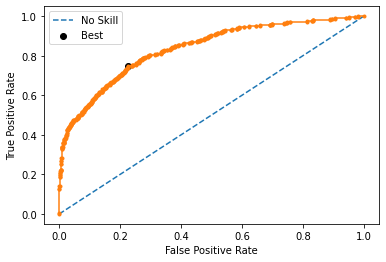

In [868]:
# predict probabilities
yhat1 = model5.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1593
           1       0.46      0.74      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.77      0.79      2000



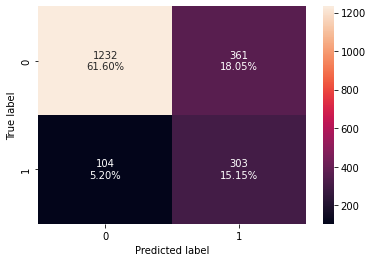

In [869]:
#Confustion matrix based on the threshold got from above plot
confusion_matrix_and_report(model5,  X_test, y_test, thresholds1[ix])

In [870]:
model_performance_classification(model5,  X_test, y_test, thresholds1[ix])

,Accuracy,Recall,Precision,F1
0,0.7675,0.744472,0.456325,0.565826


In [872]:
model_performance_classification(model5,  X_train, y_train, thresholds1[ix])

,Accuracy,Recall,Precision,F1
0,0.76525,0.755828,0.454277,0.56748


The model5 is giving 56.7% F1 score and 5.2% FP and 18.% FN. It decreased the FP & increased the FN as compared to model4. This can be candidate for consideration as this model is not overfitting like previous one


**Model 6: SMOTE + Batch Normalization**

In [873]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [874]:
model6 = Sequential()
model6.add(Dense(32,activation='relu',input_dim = X_sm.shape[1]))
model6.add(BatchNormalization())
model6.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
model6.add(Dense(1, activation = 'sigmoid'))
model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 753
Trainable params: 689
Non-trainable params: 64
_________________________________________________________________


In [875]:
optimizer = tf.keras.optimizers.Adam(0.0001)
model6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [876]:
history6 = model6.fit(X_sm,y_sm,batch_size=64,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.7678 - accuracy: 0.5759 - val_loss: 1.0102 - val_accuracy: 0.1861
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5966 - val_loss: 1.0063 - val_accuracy: 0.2230
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6253 - val_loss: 0.9577 - val_accuracy: 0.2712
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6521 - val_loss: 0.9188 - val_accuracy: 0.3166
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.6748 - val_loss: 0.8871 - val_accuracy: 0.3487
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.6894 - val_loss: 0.8662 - val_accuracy: 0.3864
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7013 - val_loss: 0.8519 - val_accuracy: 0.4095

63/63 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8310


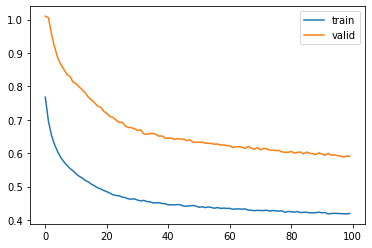

In [877]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history6.history)
hist['epoch'] = history6.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results6 = model6.evaluate(X_test, y_test)

From above plot, we can say that the validation and training curve are smooth.But, there are not close to each other, Hence it could be overfitting.

Best Threshold=0.380045, G-Mean=0.783


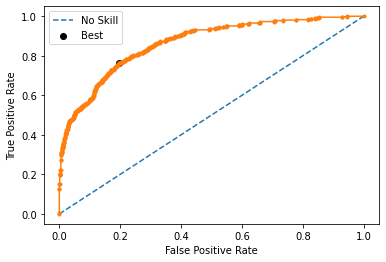

In [878]:
# predict probabilities
yhat1 = model6.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.50      0.76      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



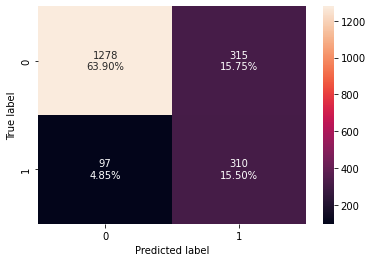

In [879]:
#Confustion matrix based on the threshold got from above plot
confusion_matrix_and_report(model6,  X_test, y_test, thresholds1[ix])

In [880]:
model_performance_classification(model6,  X_test, y_test, thresholds1[ix])

,Accuracy,Recall,Precision,F1
0,0.794,0.761671,0.496,0.600775


In [881]:
model_performance_classification(model6,  X_train, y_train, thresholds1[ix])

,Accuracy,Recall,Precision,F1
0,0.800375,0.77362,0.506629,0.612285


The model6 is giving 57.8% F1 score and 3.5% FP and 20.9% FN. It decreased the FP tremendously, but definately its overfitting.

**Model 7 - Random Search CV + SMOTE + batch normalization**


In [882]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [883]:
#define model to use furhter in Keras Classifier
def create_model_v7(lr,batch_size, unit):
  np.random.seed(1)
  model = Sequential()
  model.add(Dense(unit,activation='relu',input_dim = X_sm.shape[1]))
  model.add(BatchNormalization())
  model.add(Dense(8,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(1, activation = 'sigmoid'))
  model.summary()   
  #compile model
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [884]:
# Hyperparameter tuning using KerasClassifier and RandomizedSearch
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.0001,0.001],
    "nb_epoch":[100, 110, 95],
    "unit":[6, 10, 16, 32, 64],
    }

kfold_splits = 5
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [885]:
#Using SMOTE training data to fit the model
random_result = random.fit(X_sm, y_sm,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 385
Trainable params: 353
Non-trainable params: 32
_________________________________________________________________
319/319 [==============================] - 1s 3ms/step - loss:

In [886]:
#Create model using the parameters identified from RandomSearch hyperparameter tuning
model7=create_model_v7(batch_size=random_result.best_params_['batch_size'],
                             lr=random_result.best_params_['lr'],
                             unit=random_result.best_params_['unit'])

model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                176       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 385
Trainable params: 353
Non-trainable params: 32
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Outp

In [887]:
#Use the model tuned using RandomSearch to fit the model on SMOTE training set
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history7=model7.fit(X_sm, y_sm, epochs=random_result.best_params_['nb_epoch'], batch_size = random_result.best_params_['unit'], verbose=1,validation_split=0.2)

Epoch 1/95
638/638 [==============================] - 2s 2ms/step - loss: 0.5192 - accuracy: 0.7432 - val_loss: 0.7461 - val_accuracy: 0.5580
Epoch 2/95
638/638 [==============================] - 1s 2ms/step - loss: 0.4739 - accuracy: 0.7720 - val_loss: 0.7263 - val_accuracy: 0.6050
Epoch 3/95
638/638 [==============================] - 1s 2ms/step - loss: 0.4606 - accuracy: 0.7742 - val_loss: 0.6562 - val_accuracy: 0.6434
Epoch 4/95
638/638 [==============================] - 1s 2ms/step - loss: 0.4531 - accuracy: 0.7836 - val_loss: 0.6929 - val_accuracy: 0.6062
Epoch 5/95
638/638 [==============================] - 1s 2ms/step - loss: 0.4532 - accuracy: 0.7816 - val_loss: 0.6686 - val_accuracy: 0.6356
Epoch 6/95
638/638 [==============================] - 1s 2ms/step - loss: 0.4522 - accuracy: 0.7848 - val_loss: 0.6896 - val_accuracy: 0.6403
Epoch 7/95
638/638 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.7865 - val_loss: 0.5372 - val_accuracy: 0.7304
Epoch 

63/63 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8460


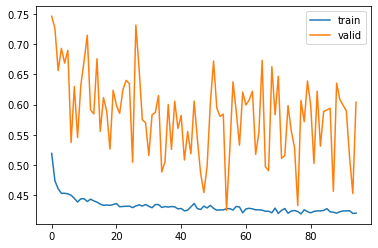

In [888]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history7.history)
hist['epoch'] = history7.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results6 = model7.evaluate(X_test, y_test)

From above plot, we can say that the validation set is way too noisy. 

Best Threshold=0.287273, G-Mean=0.790


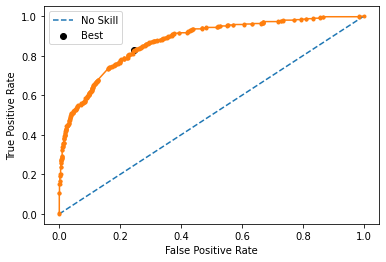

In [889]:
# predict probabilities
yhat1 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1593
           1       0.46      0.83      0.59       407

    accuracy                           0.77      2000
   macro avg       0.70      0.79      0.72      2000
weighted avg       0.85      0.77      0.79      2000



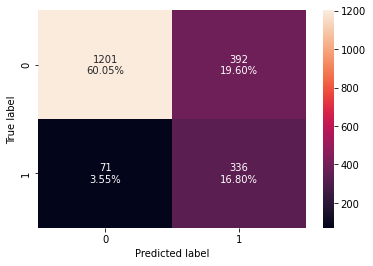

In [890]:
#Confustion matrix based on the threshold got from above plot
confusion_matrix_and_report(model7,  X_test, y_test, thresholds1[ix])

In [891]:
model_performance_classification(model7,  X_test, y_test, thresholds1[ix])

,Accuracy,Recall,Precision,F1
0,0.7685,0.825553,0.461538,0.59207


The model7 is giving 61% F1 score and 4.55% FP and 15.5% FN. The F1 score is way better than any of the models we built previously. But, since the vaidation set was too noisy, this is not a good idea to select this model. 


**Model 8 - kera Tuner**

In [895]:
#import keras tuners libraries
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [896]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [897]:
# build the model using Keratuner
def build_model_v1(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 5)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=8,
                                            max_value=64,
                                            step=8),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [0.01, 0.001, 0.0001])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [898]:
tuner_v1 = RandomSearch(
    build_model_v1,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

INFO:tensorflow:Reloading Oracle from existing project ./Job_/oracle.json
INFO:tensorflow:Reloading Tuner from ./Job_/tuner0.json


In [899]:
tuner_v1.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 100, 'step': 8, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 100, 'step': 8, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 100, 'step': 8, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 100, 'step': 8, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 100, 'step': 8, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 100, 'step': 8, 'sampling': None}
units_6 (Int)
{'default': None, 'conditions': [

In [900]:
### Searching the best model on X and y train
tuner_v1.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

INFO:tensorflow:Oracle triggered exit


In [901]:
## Printing the best models with their hyperparameters
tuner_v1.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 56
learning_rate: 0.001
units_2: 88
units_3: 40
units_4: 80
units_5: 24
units_6: 56
units_7: 24
units_8: 16
Score: 0.8687500158945719
Trial summary
Hyperparameters:
num_layers: 8
units_0: 64
units_1: 24
learning_rate: 0.001
units_2: 56
units_3: 16
units_4: 80
units_5: 16
units_6: 88
units_7: 32
units_8: 72
Score: 0.8629166483879089
Trial summary
Hyperparameters:
num_layers: 5
units_0: 16
units_1: 32
learning_rate: 0.001
units_2: 32
units_3: 96
units_4: 96
units_5: 64
units_6: 72
units_7: 80
units_8: 80
Score: 0.8585416674613953
Trial summary
Hyperparameters:
num_layers: 9
units_0: 40
units_1: 16
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 64
units_5: 80
units_6: 40
units_7: 56
units_8: 32
Score: 0.8310416539510092
Trial summary
Hyperparameters:
num_layers: 9
units_0: 80
units_1: 32
learning_rate: 0.0001
uni



Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [902]:
model8 = Sequential()
model8.add(Dense(64,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model8.add(BatchNormalization())
model8.add(Dense(56,activation='relu',kernel_initializer='he_uniform'))
model8.add(BatchNormalization())
model8.add(Dense(88,activation='relu',kernel_initializer='he_uniform'))
model8.add(BatchNormalization())
model8.add(Dense(40,activation='relu',kernel_initializer='he_uniform'))
model8.add(BatchNormalization())
model8.add(Dense(80,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dense(1, activation = 'sigmoid'))

In [903]:
optimizer = tf.keras.optimizers.Adam(0.001)
model8.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [904]:
history8 = model8.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4713 - accuracy: 0.7891 - val_loss: 0.3819 - val_accuracy: 0.8413
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3832 - accuracy: 0.8380 - val_loss: 0.3578 - val_accuracy: 0.8556
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.8484 - val_loss: 0.3573 - val_accuracy: 0.8519
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3541 - accuracy: 0.8516 - val_loss: 0.3525 - val_accuracy: 0.8544
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3462 - accuracy: 0.8547 - val_loss: 0.3701 - val_accuracy: 0.8575
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8498 - val_loss: 0.3708 - val_accuracy: 0.8531
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8614 - val_loss: 0.3646 - val_accuracy: 0.8500

63/63 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.8145


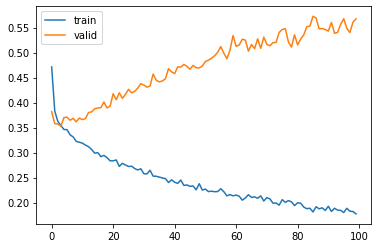

In [905]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history8.history)
hist['epoch'] = history8.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results8 = model8.evaluate(X_test, y_test)

From above plot, we can say that the model is overfitting, because the training set and validation test are apart from each other in terms of loss.

Best Threshold=0.088889, G-Mean=0.732


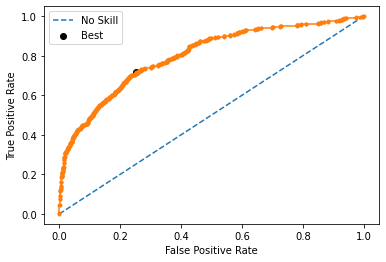

In [906]:
# predict probabilities
yhat1 = model8.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1593
           1       0.42      0.71      0.53       407

    accuracy                           0.74      2000
   macro avg       0.66      0.73      0.67      2000
weighted avg       0.81      0.74      0.76      2000



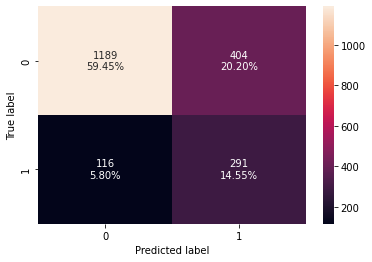

In [907]:
#Confustion matrix based on the threshold got from above plot

confusion_matrix_and_report(model8,  X_test, y_test, thresholds1[ix])

In [908]:
model_performance_classification(model8,  X_test, y_test, thresholds1[ix])

,Accuracy,Recall,Precision,F1
0,0.74,0.714988,0.418705,0.528131


The model8 is giving 52% F1 score and 5.8% FP and 20.2% FN. The kera Tuner model has given us the poor performance in any of the models we trained. 


**Model Selection:**
In this dataset, the SMOTE oversampling technique does not work well, as both the models we tried building have overfitted on the training dataset.

So, Model 1 and Model 2 are giving similar results in terms of F1 score. But if we see Recall, Model 1 does good whereas Precision is good in Model 1. Accuracy of Model 2 is little higher than Model 1. Even if I am using F1 score as evaluation metrics, since both models have same F1 score, I will check the Recall score as if we reduce the FN, the opportunties will increase. 

Hence, Our final model here can be **Model 1**It gives us 56% F1 score and 78% Recall score and 44% precision.

**Scope of Improvement**
- Build any classification model and use it to get important features. You can build the neural network using these features only.
- You can also check during EDA which features play important role in model, which dont. Remove those that are not much significant.

**Conclusion and key takeaways for Business**
- The Bank should run this model to identify customers who will leave or who won't. Add more data and train the model to identify new patterns and insights.
- Retaining of Customers are dependent on factors like location of the customer, gender, no. of products bank offers, customer activities etc.
- Bank should focus on these factors and provide them better service, so that they dont leave the Bank. 
- Customers located at Germany leaving more than any other locations. Bank should provide better customer service, better products, etc to this location to reduce churning.
- Even though higher number of customers are male in Bank, the female are leaving more. The bank may not be providing better service to women than men. Hence, Bank should focus on more women and market their services them. May be provide good offers and discounts to products that are used by women more. So that, women could join the bak and stay for longer time.
- Customers who are not active in bank are leaving. Bank can periodically check the activity of customers and may be send them notification if they are not active. This way, customer will feel that bank is giving them importance and dont leave.
- These type of actions should be taken by bank to retain their customer base. 